In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [13]:
import os
import shutil
import random
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_pneumonia = 'Desktop/Licenta-Data/Train/Chest'
test_pneumonia = 'Desktop/Licenta-Data/Test/Chest'
valid_pneumonia = 'Desktop/Licenta-Data/Validation/Chest'

In [15]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_pneumonia, target_size=(224,224), classes=['Pneumonia', 'NoPneumonia'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_pneumonia, target_size=(224,224), classes=['Pneumonia', 'NoPneumonia'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_pneumonia, target_size=(224,224), classes=['Pneumonia', 'NoPneumonia'], batch_size=10, shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
assert train_batches.n == 5216
assert valid_batches.n == 16
assert test_batches.n == 624

In [17]:
imgs, labels = next(train_batches)

In [18]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

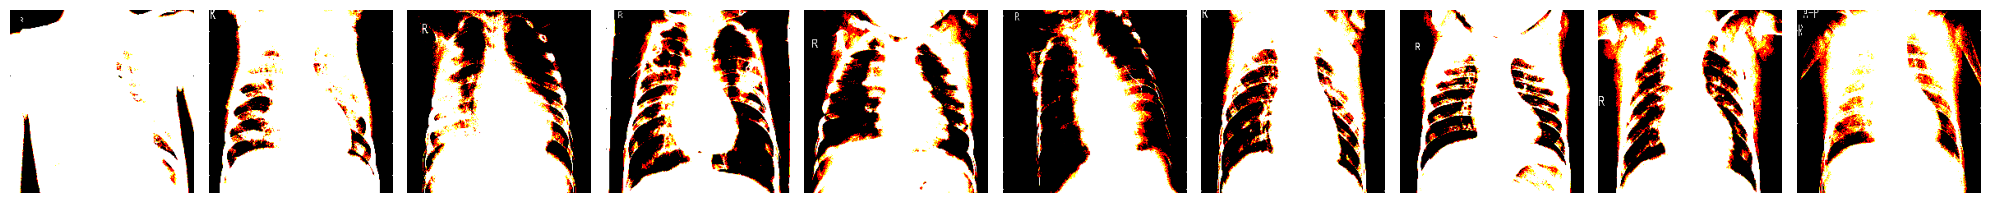

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [19]:
plotImages(imgs)
print(labels)


In [20]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10


2023-09-07 18:42:42.528347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-07 18:42:42.596898: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-07 18:42:42.824937: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe20c0452e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-07 18:42:42.824986: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 SUPER, Compute Capability 7.5
2023-09-07 18:42:42.834078: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-07 18:42:42.911368: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-07 18:42:42.952940: I ./tensorflow/compiler/jit/devic

522/522 - 33s - loss: 1.7081 - accuracy: 0.9363 - val_loss: 1.5612 - val_accuracy: 0.7500 - 33s/epoch - 63ms/step
Epoch 2/10
522/522 - 30s - loss: 0.1293 - accuracy: 0.9774 - val_loss: 2.3747 - val_accuracy: 0.6875 - 30s/epoch - 57ms/step
Epoch 3/10
522/522 - 28s - loss: 0.0312 - accuracy: 0.9925 - val_loss: 1.5428 - val_accuracy: 0.7500 - 28s/epoch - 54ms/step
Epoch 4/10
522/522 - 26s - loss: 0.0346 - accuracy: 0.9918 - val_loss: 0.4745 - val_accuracy: 0.8125 - 26s/epoch - 50ms/step
Epoch 5/10
522/522 - 26s - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.5483 - val_accuracy: 0.8750 - 26s/epoch - 50ms/step
Epoch 6/10
522/522 - 26s - loss: 0.0168 - accuracy: 0.9958 - val_loss: 0.5327 - val_accuracy: 0.8750 - 26s/epoch - 50ms/step
Epoch 7/10
522/522 - 26s - loss: 0.0367 - accuracy: 0.9912 - val_loss: 0.7756 - val_accuracy: 0.8750 - 26s/epoch - 50ms/step
Epoch 8/10
522/522 - 26s - loss: 0.0105 - accuracy: 0.9962 - val_loss: 1.0713 - val_accuracy: 0.8125 - 26s/epoch - 50ms/step
Epoch 9/10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

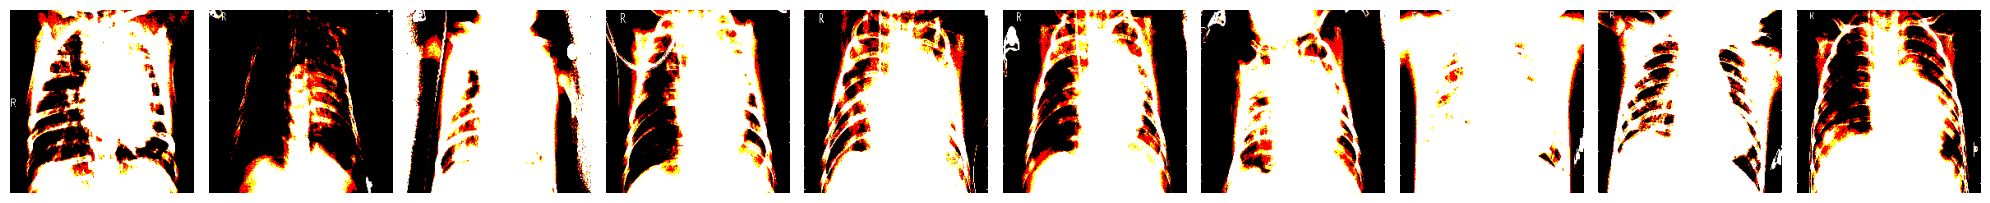

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [23]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [24]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [25]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [26]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[390   0]
 [200  34]]


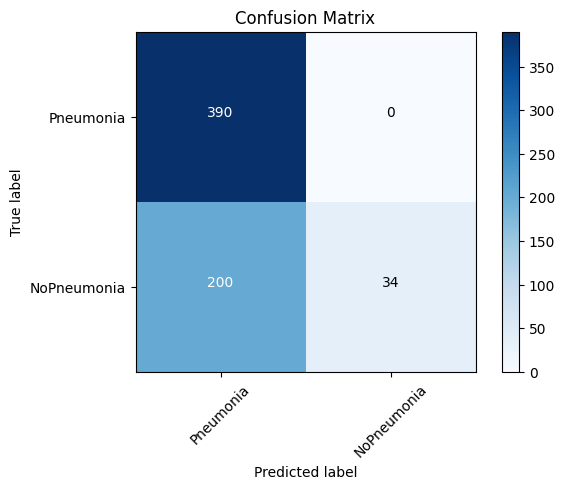

In [28]:
cm_plot_labels = ['Pneumonia','NoPneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')